# Framingham Heart Study #

### Binary Logistic Regression

In the following analysis, we are going to use the FramingHam Heart Study data set, more information about the data set can be found in the readme file in the GitHub repo.

The aim of this analysis is to fit a binary logistic regression machine learning model that accurately predicts whether or not the patients in the data set will develop a coronary heart disease in the next 10 years, followed by understanding the influence of significant factors that truly affects them. Next, testing the trained model’s generalization (model evaluation) strength on the unseen data set.

### Data and Library Import

In [131]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm

In [132]:
# read in the data
framingham_data = pd.read_csv('framingham.csv')

## 1. Exploratory Data Analysis ##

In [133]:
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [134]:
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [135]:
len(framingham_data)

4238

In [136]:
# information about the dataset
framingham_data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


# 2. Data Visualizations #

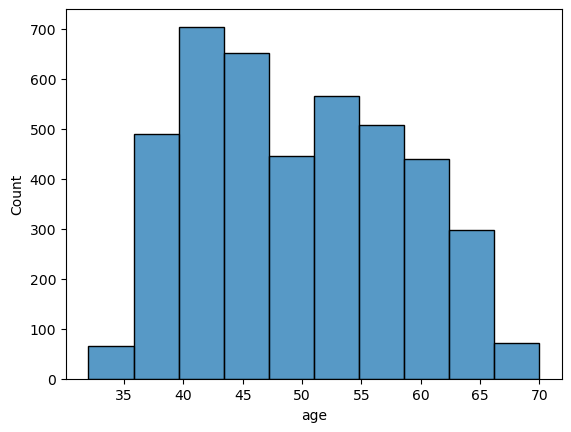

In [156]:
# age distribution data set
sns.histplot(x = 'age', data=framingham_data,bins=10)
plt.show()

In [148]:
framingham_data.groupby('male').agg({'age': ['mean', 'min', 'max']})

age        
           mean min max
male                   
0     49.800331  32  70
1     49.298516  33  69

## Observations :

The patients in the data set are between 32 - 70 years. The mean age for male and female patients is 49 years.

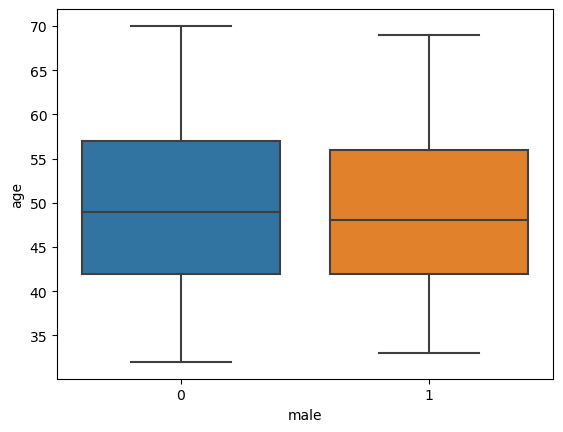

In [150]:
sns.boxplot(y = framingham_data['age'], x = framingham_data['male'])
plt.show()

In [155]:
framingham_data.groupby('male')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
male,,,,,,,,
0,2419.0,49.800331,8.596856,32.0,42.0,49.0,57.0,70.0
1,1819.0,49.298516,8.533146,33.0,42.0,48.0,56.0,69.0


## Observations :

The main part of the chart (the “box”) shows where the middle portion of the data is: the interquartile range. At the ends of the box, you” find the first quartile (the 25% mark) and the third quartile (the 75% mark). It shows that in the data set the interquartile range for women is between 42 and 57 years and for men between 42 and 56 years

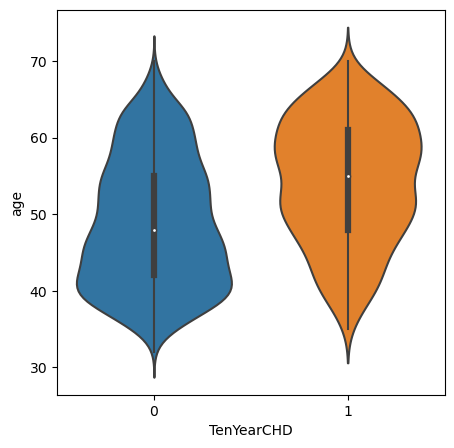

In [164]:
plt.figure(figsize=(5,5))
sns.violinplot(x='TenYearCHD', y='age', data=framingham_data)
plt.show()

## Observations :

The violin plot shows that the risk of developing a coronary heart disease increases as a person gets older.

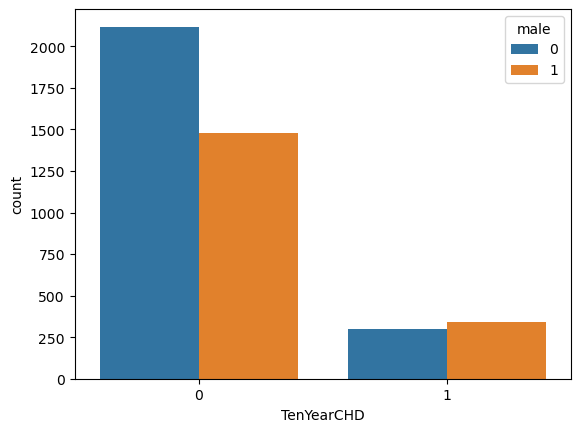

In [ ]:
# countplot developing CHD in 10 years by gender
sns.countplot(x = 'TenYearCHD', data=framingham_data, hue='male')
plt.show()

## Observations :

The bar chart shows that male patient have a higher risk of developing a coronary heart disease

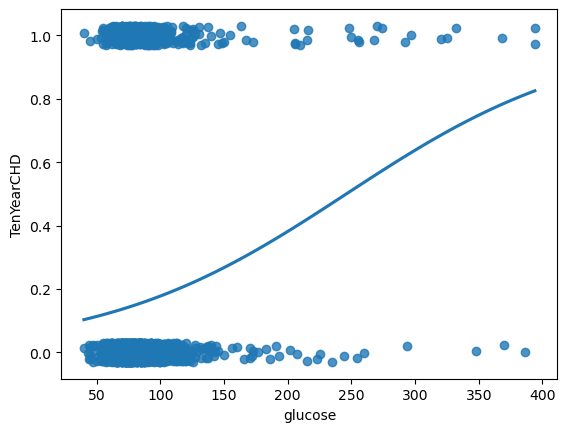

In [194]:
sns.regplot(x = 'glucose', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None)
plt.show()

## Observations :

We can initially fit a logistic regression line using seaborn’s regplot( ) function to visualize how the probability of developing CHD changes with the glucose label. The “glucose” was plotted on the x-axis and “diabetes” on the y-axis using regplot( ). In a similar fashion, we can check the logistic regression plot with other variables. This type of plot is only possible when fitting a logistic regression using a single independent variable. The current plot gives you an intuition of how the logistic model fits an ‘S’ curve line and how the probability changes from 0 to 1 with observed values. In the oncoming model fitting, we will train/fit a multiple logistic regression model, which includes multiple independent variables.

In [140]:
framingham_data.groupby('male').agg({'age': ['mean', 'min', 'max']})

age        
           mean min max
male                   
0     49.800331  32  70
1     49.298516  33  69

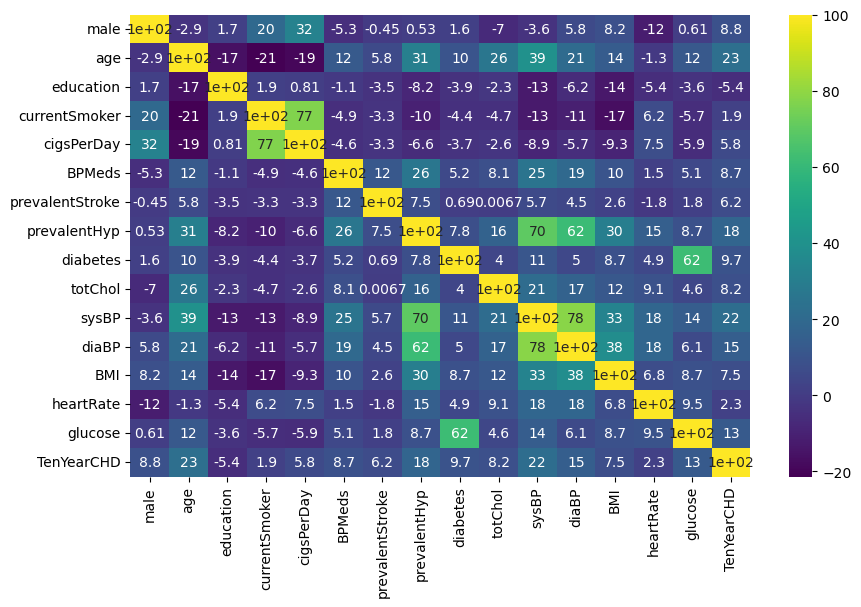

In [191]:
# Heatmap for correlation visualization
plt.figure(figsize=(10,6))
sns.heatmap(framingham_data.corr()*100,annot=True,cmap='viridis')
plt.show()

## Observations :

Correlation plot shows insightful information about the relation within the attributes. It can Either be negative or positive or 0. We need to always keep 1 feature from 2 Strongly Correlated ones. This is important information since the Optimization Model we will be using in the analysis is assuming that the variables are independent from each other, so we will clean up the variables with a high correlation (keeping with one with higher predictive power)

- currentSmoker & cigsPerDay has strong Correlation of 77 (Scaled for better Observations)
- prevalentHyp vs sysBP / diaBP are having Positive Correlation of 70 and 62.
- Glucose & diabetes are postively Correlated. (60)
- sysBP & diaBP are also having Positive Correlation. (78)

## 3. Data Preparation & Cleaning ##

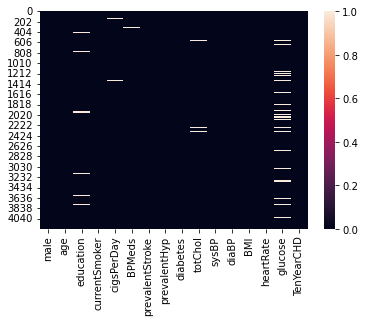

In [8]:
# visualize null values
sns.heatmap(framingham_data.isna())
plt.show()

In [9]:
# remove rows where education = 0
framingham_data = framingham_data.dropna(subset = ['education'])

# fill NaN with mean for missing values
framingham_data['glucose'].fillna(framingham_data['glucose'].mean(), inplace = True)
framingham_data['cigsPerDay'].fillna(framingham_data['cigsPerDay'].mean(), inplace = True)
framingham_data['BPMeds'].fillna(framingham_data['BPMeds'].mean(), inplace = True)
framingham_data['totChol'].fillna(framingham_data['totChol'].mean(), inplace = True)
framingham_data['BMI'].fillna(framingham_data['BMI'].mean(), inplace = True)
framingham_data['heartRate'].fillna(framingham_data['heartRate'].mean(), inplace = True)

In [10]:
framingham_data.insert(loc=0, column='intercept', value=1)
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# function that standardizes the values in a column
def standardize_numeric_features(df, column):
    return round((df[column] - df[column].mean()) / df[column].std(), 6)

framingham_data['age'] = standardize_numeric_features(framingham_data, 'age')
framingham_data['cigsPerDay'] = standardize_numeric_features(framingham_data, 'cigsPerDay')
framingham_data['totChol'] = standardize_numeric_features(framingham_data, 'totChol')
framingham_data['sysBP'] = standardize_numeric_features(framingham_data, 'sysBP')
framingham_data['diaBP'] = standardize_numeric_features(framingham_data, 'diaBP')
framingham_data['BMI'] = standardize_numeric_features(framingham_data, 'BMI')
framingham_data['heartRate'] = standardize_numeric_features(framingham_data, 'heartRate')
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.233086,4.0,0,-0.759738,0.0,0,0,0,-0.948785,-1.194142,-1.076936,0.292421,0.338408,77.0,0
1,1,0,-0.415484,2.0,0,-0.759738,0.0,0,0,0,0.303800,-0.514804,-0.156639,0.724391,1.583411,76.0,0
2,1,1,-0.181884,1.0,1,0.922968,0.0,0,0,0,0.189929,-0.220424,-0.240302,-0.107642,-0.076592,70.0,0
3,1,0,1.336519,3.0,1,1.764320,0.0,0,1,0,-0.265557,0.798582,1.014649,0.687575,-0.906594,103.0,1
4,1,0,-0.415484,3.0,1,1.175373,0.0,0,0,0,1.100900,-0.107202,0.094352,-0.657421,0.753409,85.0,0


# 4. Data Modelling #

Building Model using Logistic Regression

In [182]:
# Separate Dependent and Independent Variables
x = framingham_data[['male','age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = framingham_data['TenYearCHD']

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [185]:
# import Logistic Regression package
from sklearn.linear_model import LogisticRegression

In [186]:
# Fit Logistic Regression
lr = LogisticRegression()

In [187]:
lr.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [188]:
# predict
prediction = lr.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Testing #

In [189]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

NameError: name 'prediction' is not defined

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

NameError: name 'prediction' is not defined